#1. 헬로 파이썬

## 넘파이

###브로드캐스트

자동으로 크기에 맞게 계산하는 기능

In [1]:
import numpy as np

In [2]:
A = np.array([[1,2],[3,4]])
B = np.array([10,20])

In [3]:
#넘파이 배열에서 * 연산은 원소끼리의 곱..

A * B

array([[10, 40],
       [30, 80]])

## matplotlib

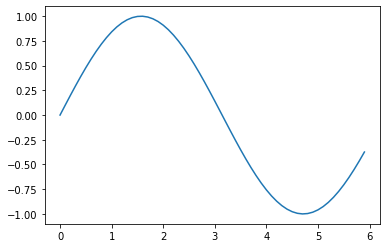

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#데이터 준비
x = np.arange(0, 6, 0.1)    #0에서 6까지 0.1 간격으로 생성
y = np.sin(x)

#그래프 그리기
plt.plot(x, y)
plt.show()

#2. 퍼셉트론

##퍼셉트론이란?

- 다수의 신호를 입력으로 받아 하나의 신호를 출력
- **신호** : **흐름**이 있는 것
- 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력한다

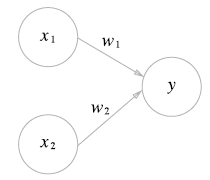

**뉴런** : 그림의 원

**가중치** : 입력신호($x_1, x_2, y)$가 뉴런에 보내질 때 곱해지는 $w_1, w_2$

**임계값**($\theta$) : 뉴런을 활성화 여부를 결정하는 한계

**동작 원리**

- $
y = \begin{cases} 0 &(w_1x_1 + w_2x_2 \le \theta) \\
\\1 &(w_1x_1 + w_2x_2 > \theta)
\end{cases}
$


## 단순한 논리 회로

- AND, NAND, OR등 여러 게이트를 만들자..
- 진리표에 맞도록 $w_1, w_2, \theta$의 값을 조정하면 된다..
    - 각 게이트의 차이는 이 매개변수 차이 뿐이다

##퍼셉트론 구현하기

- 입력이 $x_1, x_2$
- 가중치와 임계값은 함수 안에서 초기화..

In [5]:
# AND 게이트

def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7   #진리표를 만족하는 매개변수..
    tmp = x1*w1 + x2*w2

    #임계값과의 비교
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [6]:
#확인

print(AND(0,0))     #0
print(AND(0,1))     #0
print(AND(1,0))     #0
print(AND(1,1))     #1

0
0
0
1


###가중치와 편향 도입

$
y = \begin{cases} 0 &(b + w_1x_1 + w_2x_2 \le 0) \\
\\1 &(b + w_1x_1 + w_2x_2 > 0)
\end{cases}
$

여기에서, $\theta = -b$

**편향**($b$)

: 뉴런이 얼마나 쉽게 활성화 하느냐를 조정

**가중치**($w_1, w_2$)

: 각 입력신호가 결과에 주는 영향력을 조정

In [7]:
import numpy as np
x = np.array([0,1])         #입력
w = np.array([0.5, 0.5])    #가중치
b = -0.7                    #편향

print(x*w)
print(np.sum(x*w))

#이 값이 0을 넘는지 여부가 중요
print(np.sum(x*w) + b)

[0.  0.5]
0.5
-0.19999999999999996


In [8]:
#다시 게이트 구현..

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [9]:
#NAND, OR 게이트도 구현..

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])      #AND게이트와 매개변수 값만 부호 반대로!
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])      #가중치 W와 b만 다르다!
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

**결론**

- 같은 구조의 퍼셉트론인데, 차이는 가중치 매개변수의 값 뿐이다..

##다층 퍼셉트론

**단층 퍼셉트론으로는 표현하지 못한 것들을 층을 하나 늘려 구현할 수 있다**

- 퍼셉트론은 직선으로 나뉜 두 영역을 만들기 때문에 한계가 있다..
- 비선형으로 나누어야할 때 다층 퍼셉트론이 필요하다..
- 기존 게이트를 쌓아서 XOR 게이트의 진리표와 같도록 만들 수 있다..

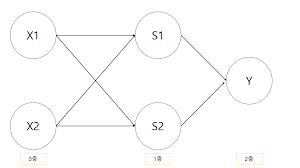

In [10]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)     #두 퍼셉트론의 결과 조합
    return y

In [11]:
#확인..

print(XOR(0,0))     #0
print(XOR(0,1))     #1
print(XOR(1,0))     #1
print(XOR(1,1))     #0

0
1
1
0


NAND 게이트를 엄청 모으면 컴퓨터까지...(이론상)

##정리

- 퍼셉트론은 입출력을 갖춘 알고리즘이다
- '가중치'와 '편향'이 매개변수이다
- 단층 퍼셉트론 : AND, NAND, OR
- 2층 퍼셉트론 : XOR
    - 단층은 직선형 영역만 표현가은..

#3. 신경망

가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 있다!

##퍼셉트론에서 신경망으로

- **입력층, 은닉층, 출력층**으로 구성..

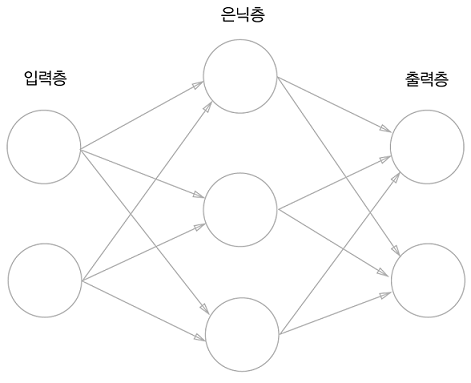

##활성화 함수

- 입력신호의 총합이 활성화를 일으키는지 결정하는 함수 $h(x)$
- 무조건 **비선형 함수**이어야 한다!!
    - 층을 쌓는 혜택을 보려면 비선형!
    - 선형은 은닉층이 없는 네트워크로 표현 가능하다..

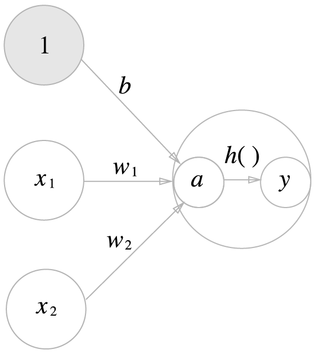

###계단함수

In [12]:
#실수 하나에 대한 계단함수

def step_fuction(x):
    if x>0:
        return 1
    else:
        return 0

In [13]:
#넘파이 배열도 지원하는 계단함수

def step_fuction(x):
    y = x>0     #Bool 형태의 넘파이 배열 변환
    return y.astype(np.int)

In [14]:
#확인..
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print(y)
print(y.astype(np.int))

[False  True  True]
[0 1 1]


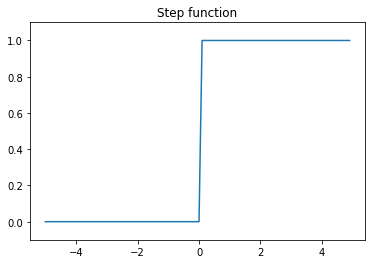

In [15]:
#그래프..
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_fuction(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)     #y축의 범위 지정
plt.title("Step function")
plt.show()

###시그모이드 함수

- $y = \dfrac{1}{1 + e^{-x}}$

In [16]:
#넘파이배열도 가능..

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
#확인..

x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


In [18]:
#브로드캐스트 기능 복습

t = np.array([1.0, 2.0, 3.0])
print(1+t)
print(1/t)

[2. 3. 4.]
[1.         0.5        0.33333333]


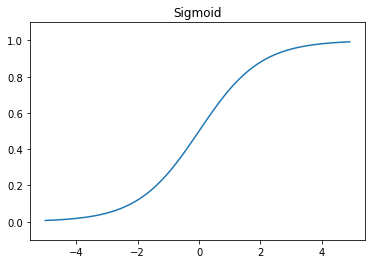

In [19]:
#그래프..

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title("Sigmoid")
plt.show()

**시그모이드와 계단 비교**

- 차이점
    - 매끄러움의 차이..
    - 퍼셉트론(계단 함수)에서는 뉴런 사이에 0 또는 1이 흘렀다..
    - 신경망(시그모이드)에서는 뉴런사이에 연속적인 실수가 흐른다!!

- 공통점
    - 모양이 비슷하다..
    - 0과 1사이의 값이다..

###ReLU 함수

- $
h(x) = \begin{cases}x & (x > 0) \\
0 & (x \le 0)
\end{cases}
$

In [20]:
def relu(x):
    return np.maximum(0, x)

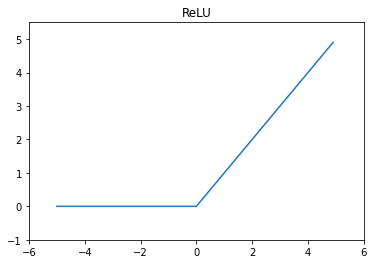

In [21]:
#그래프..

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-1, 5.5)
plt.title("ReLU")
plt.show()

##다차원 배열의 계산

- 행렬 곱은 앞에 곱해지는 행렬의 열의 수와 뒤에 곱해지는 행렬의 행의 수가 같아야 연산이 가능하다..
- np.dot(A, B)와 같이 쉽게 계산 가능하다..

In [22]:
#1차원 배열..

A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [23]:
#2차원 배열..

B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


**행렬 곱 예시**

- np.dot()
- 연산 불가하면 에러 뜸..

In [24]:
#(2,3) * (3,2)의 행렬곱

A = np.array([[1,2,3], [4,5,6]])
print(A.shape)

B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)

np.dot(A, B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [25]:
#(3,2) * (2,1)의 행렬곱

A = np.array([[1,2], [3,4], [5,6]])
print(A.shape)

B = np.array([7,8])
print(B.shape)

np.dot(A, B)

(3, 2)
(2,)


array([23, 53, 83])

###신경망에서의 행렬 곱

- $w_1x_1 + w_2x_2 + ...$ 형태이다..
- 행렬 곱으로 생각 가능!

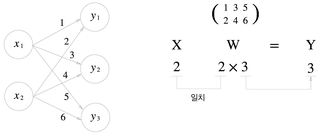

In [26]:
#구현..

X = np.array([1,2])     #입력 특성들..
print(X)
print(X.shape)

W = np.array([[1,3,5], [2,4,6]])        #가중치 매개변수..
print(W)
print(W.shape)

Y = np.dot(X, W)        #행렬곱 후에 나오는 가중치 합..
print(Y)

[1 2]
(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


##3층 신경망 구현하기

###표기법 정리

- $\mathbf{w}_{12}^{(1)}$
    - 윗 첨자 1 : 1층의 가중치라는 의미
    - 아랫첨자 1 : 다음 층의 1번째 뉴런으로 향한다는 의미
    - 아랫첨자 2 : 앞 층의 2번째 뉴런에서 나간다는 의미

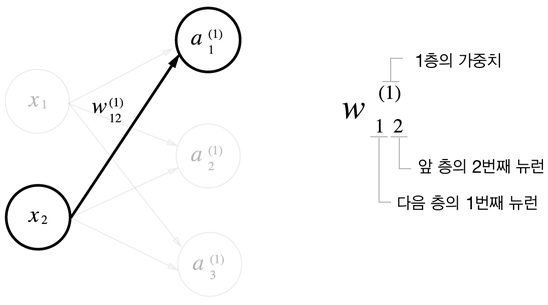

###각 층의 신호 전달 구현하기

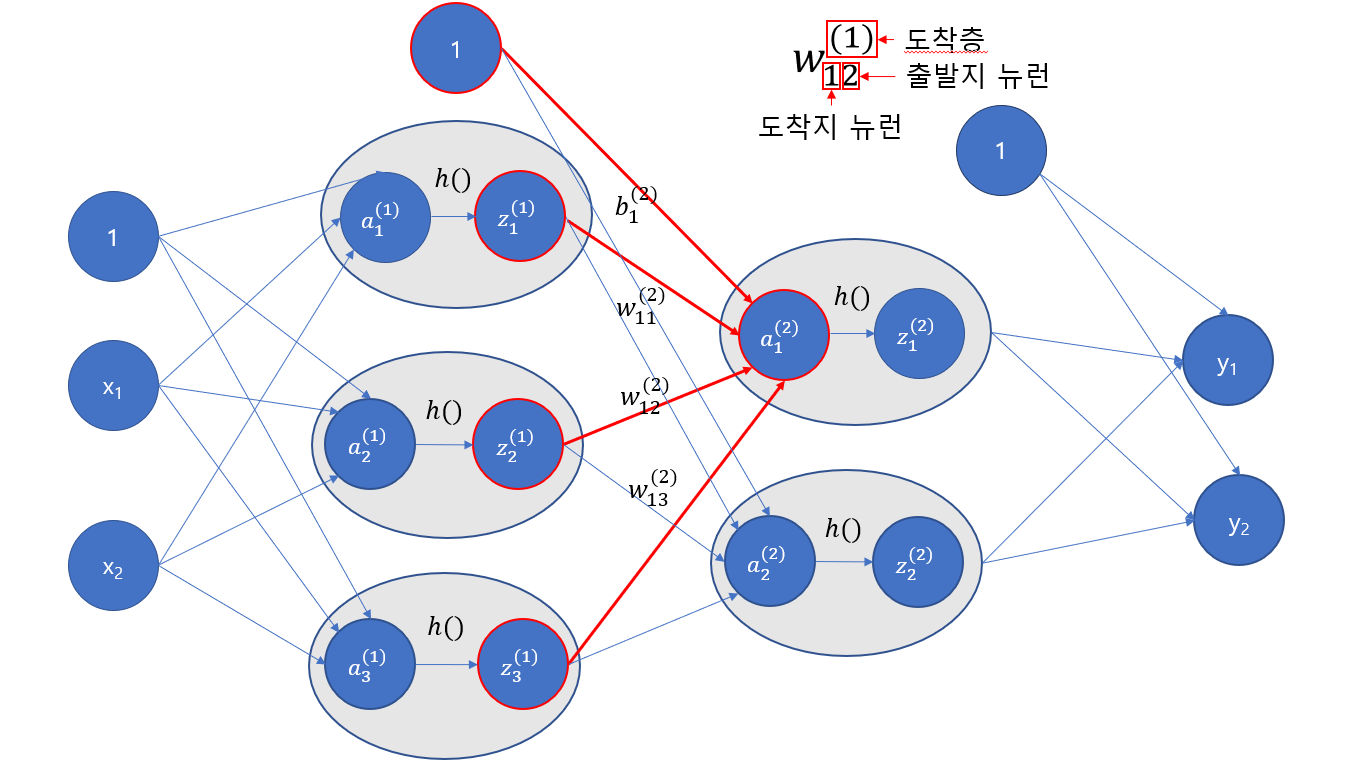

**순전파 신경망 구현**

In [27]:
#신경망의 매개변수 초기화
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def identity_function(x):
    return x

#순전파 과정 구현..
def forward(network, x):
    #매개변수 받아오기
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    #1층의 가중치합을 구한 뒤 시그모이드 함수 통과
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    #2층의 가중치합을 구한 뒤 시그모이드 함수 통과
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    #3층의 가중치합을 구하고 Identity 함수 통과..
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])        #입력 특성
y = forward(network, x)         #신경망 투입
print(y)

[0.31682708 0.69627909]


##출력층 설계하기

- 신경망은 분류와 회귀 모두 사용가능
- 어떤 문제냐에 따라 출력층의 활성화 함수가 달라짐..
    - 분류 : 소프트맥스 함수..
    - 회귀 : 항등 함수..

### 소프트맥스 함수

- $
y_k = \dfrac{\exp(a_k)}{\sum\limits_{i=1}^n\exp(a_i)}
$

- $n$ : 출력층의 뉴런 수
    - 출력층의 뉴런 수는 풀고자 하는 문제에 알맞게 선택해야 함
- $y_k$ : $k$번 째 출력
- 모든 입력신호들의 지수의 합 중에서 얼마나 비율을 차지하느냐가 중요..

**특징**

- 총합은 1이다
- 적용해도 입력 신호 사이의 대소관계는 변하지 않는다

In [28]:
#구현..

def softmax(a):
    exp_a = np.exp(a)       #브로드캐스트
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

####소프트맥스 구현 시 주의점

- 지수가 너무 커서 쉽게 오버플로가 남..
- 모든 입력에서 입력 중 최댓값을 빼서 지수를 계산한다..

In [29]:
a = np.array([1010, 1000, 990])
print(np.exp(a)/np.sum(np.exp(a)))      #오류..

c = np.max(a)
print(a - c)        #모든 입력에서 최댓값을 뺏다..

print(np.exp(a-c)/np.sum(np.exp(a-c)))  #오버플로 대처..

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


**소프트맥스 재구현**

- 오버플로 방지..

In [30]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)     #오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

##손글씨 숫자 인식

**load_mnist** 함수

- 인수
    - normalize : 입력 이미지의 픽셀을 0 ~ 1 사이의 값으로 정규화하는지 여부
    - flatten : 입력이미지를 1차원 배열로 만들지 여부
    - one_hot_label : **원 핫 인코딩** 여부

5
(784,)
(28, 28)


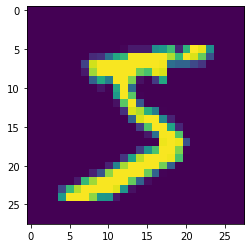

In [31]:
import sys, os
sys.path.append("/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝")
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)    #5

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)
plt.imshow(img)

In [32]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


###신경망 추론 처리

- mnist 데이터는 10개를 분류해야하므로 출력층 뉴런이 10..

In [38]:
import pickle

#추론을 위해 테스트세트만 가져옴..
def get_data():
    #전처리(정규화)도 한 셈이다..
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    #바로 가져오자..
    with open('/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)        #확률이 가장 높은 원소의 인덱스
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


##배치 처리

- **배치** : 하나로 묶은 입력 데이터

In [40]:
#가중치 모양 확인..

x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [41]:
x, t = get_data()
network = init_network()

batch_size = 100    #배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)      #확률이 가장 높은 레이블..
    accuracy_cnt += np.sum(p == t[i:i+batch_size])      #배치 단위로 맞은거 확인..

print("Accuracy:" + str(float(accuracy_cnt)/ len(x)))

Accuracy:0.9352


In [42]:
print(x_batch.shape)
print(y_batch.shape)

(100, 784)
(100, 10)


##정리

- 신경망에서는 매끄러운 활성화 함수 사용
- 다차원 배열을 잘 사용해라..
- 입력데이터를 묶은 것을 배치라 하고, 추론 처리를 배치 단위로 하면 결과를 훨씬 빨리 얻을 수 있다..

#4. 신경망 학습